In [3]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
# import graphs.my_graph as my_graph
import os, sys
sep = os.path.sep
sys.path.append('..'+sep+'..')
from data_analysis.IO.hdf5 import load_dict_from_hdf5, save_dict_to_hdf5
from data_analysis.processing.signanalysis import gaussian_smoothing, smooth
from analysis.plots import plot_vclamp_down_state_protocol, plot_current_events_following_thal_spikes
from data_analysis.Up_and_Down_charact.classification_from_LFP import Mukovski_method
from analysis.process import preprocess_data
from graphs.my_graph import set_plot

ImportError: No module named 'analysis'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [95]:
DATAFILES = ['data/Inh-Currents_Cell0_1.h5'] # SAMPLE OF DATA
# FULL DATASET:
DATAFILES = ['data/Inh-Currents_Cell1_1.h5', 'data/Inh-Currents_Cell2_1.h5', 'data/Inh-Currents_Cell3_1.h5', 'data/Inh-Currents_Cell4_1.h5']

In [96]:
def get_spikes_that_fall_in_down_states(data, security=50e-3):
    SPIKES = []
    for spktimes in data['ThalSpikes']:
        for (t0, t1) in data['down_intervals']:
            if (spktimes>t0+security) and (spktimes<t1-security):
                SPIKES.append(spktimes)
    data['thal_spks_in_down_state'] = np.array(SPIKES)
    print(round(100*len(data['thal_spks_in_down_state'])/len(data['ThalSpikes'])), '% of thal. spikes in Down state')
    SPIKES = []
    for spktimes in data['CortSpikes']:
        for (t0, t1) in data['down_intervals']:
            if (spktimes>t0+security) and (spktimes<t1-security):
                SPIKES.append(spktimes)
    data['cort_spks_in_down_state'] = np.array(SPIKES)
    print(round(100*len(data['cort_spks_in_down_state'])/len(data['CortSpikes'])), '% of cort. spikes in Down state')    

In [97]:
DATA = []
frac_thal_spikes, frac_cort_spikes = [], []
for filename in DATAFILES:
    print('DATAFILE :', filename)
    data = load_dict_from_hdf5(filename)
    preprocess_data(data)
    Mukovski_method(data, with_down_intervals=True)
    get_spikes_that_fall_in_down_states(data)
    frac_thal_spikes.append(100*len(data['thal_spks_in_down_state'])/len(data['ThalSpikes']))
    frac_cort_spikes.append(100*len(data['cort_spks_in_down_state'])/len(data['CortSpikes']))
    DATA.append(data)

DATAFILE : data/Inh-Currents_Cell1_1.h5


23 % of thal. spikes in Down state


9 % of cort. spikes in Down state
DATAFILE : data/Inh-Currents_Cell2_1.h5


15 % of thal. spikes in Down state
10 % of cort. spikes in Down state
DATAFILE : data/Inh-Currents_Cell3_1.h5


31 % of thal. spikes in Down state
29 

% of cort. spikes in Down state
DATAFILE : data/Inh-Currents_Cell4_1.h5
6 % of thal. spikes in Down state
1 % of cort. spikes in Down state


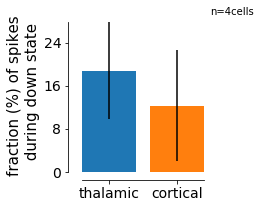

In [98]:
fig, ax = plt.subplots(figsize=(2.5, 3))
ax.bar([0], np.mean(frac_thal_spikes), yerr=np.std(frac_thal_spikes))
ax.bar([1], np.mean(frac_cort_spikes), yerr=np.std(frac_cort_spikes))
ax.annotate('n='+str(len(frac_cort_spikes))+'cells', (ax.get_xlim()[1], ax.get_ylim()[1]))
set_plot(ax, xticks=[0,1], xticks_labels=['thalamic', 'cortical'], ylabel='fraction (%) of spikes \n during down state')

In [6]:
from analysis.process import get_current_events_following_thal_spikes
for data in DATA:
    get_current_events_following_thal_spikes(data)

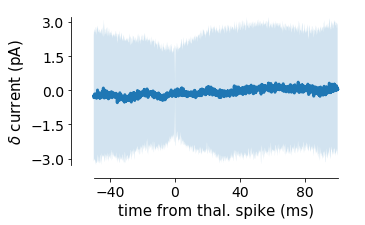

In [9]:
plot_current_events_following_thal_spikes(DATA[3])

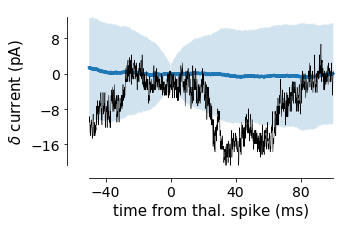

In [19]:
plot_current_events_following_thal_spikes(DATA[1], some_events=np.arange(57, 58))
# for i in [14, 22, 42]:
#     plot_current_events_following_thal_spikes(DATA[1], some_events=[i])

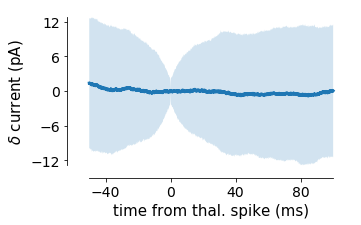

In [167]:
plot_current_events_following_thal_spikes(DATA[1])

In [0]:
plot_current_events_following_thal_spikes(DATA[1])

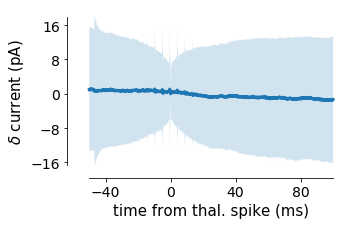

In [168]:
plot_current_events_following_thal_spikes(DATA[2], some_events=)

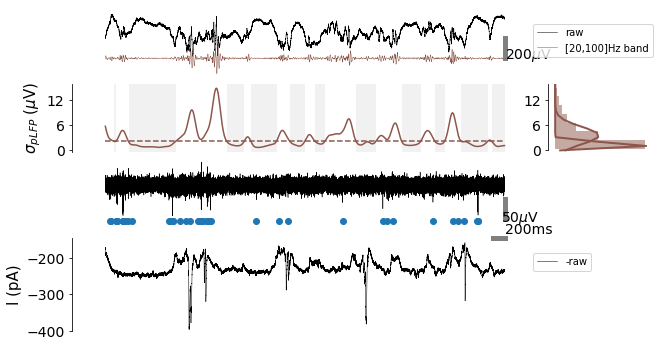

In [35]:
 = plot_vclamp_down_state_protocol(DATA[0], t0=100, twindow=7);

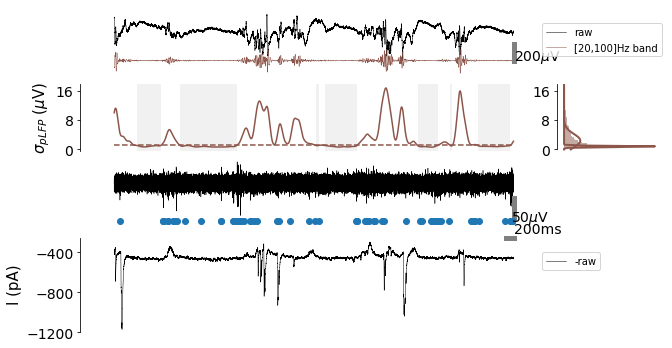

In [171]:
plot_vclamp_down_state_protocol(DATA[1], t0=10, twindow=10);

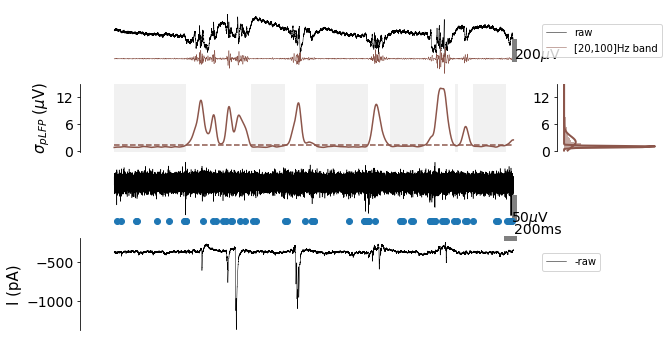

In [38]:
plot_vclamp_down_state_protocol(DATA[2], t0=110, twindow=10);

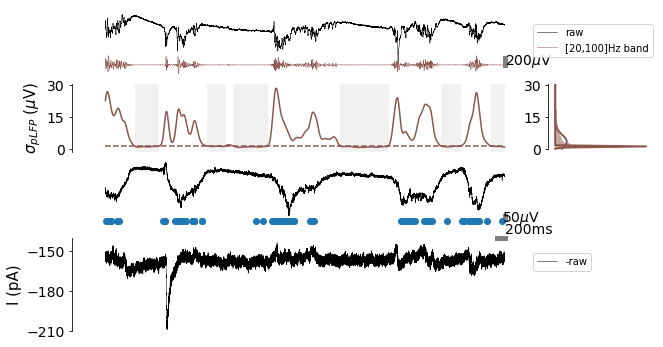

In [10]:
plot_vclamp_down_state_protocol(DATA[3], t0=110, twindow=10);

In [99]:

Inh_data1 = load_dict_from_hdf5('data/Inh-Currents_Cell1_1_analyzed.h5')
Inh_data2 = load_dict_from_hdf5('data/Inh-Currents_Cell2_1_analyzed.h5')
Inh_data3 = load_dict_from_hdf5('data/Inh-Currents_Cell3_1_analyzed.h5')
Inh_data4 = load_dict_from_hdf5('data/Inh-Currents_Cell4_1_analyzed.h5')


In [100]:
from analysis.process import get_ISPC_waveform, compute_IPSC_trig_thal_firing
from analysis.plots import plot_ipsc_waveform, plot_previous_thal_spikes

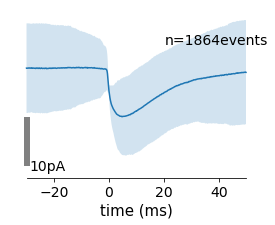

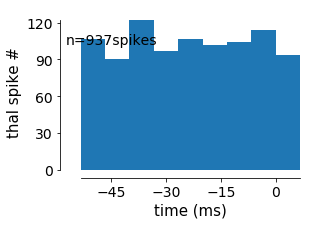

In [101]:
plot_ipsc_waveform(*get_ISPC_waveform(Inh_data1));
plot_previous_thal_spikes(*compute_IPSC_trig_thal_firing(Inh_data1));

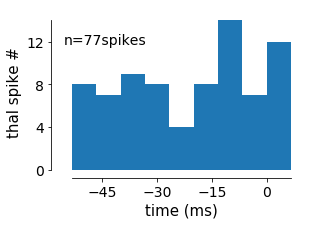

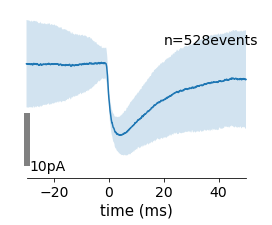

In [91]:
plot_ipsc_waveform(*get_ISPC_waveform(Inh_data2));
plot_previous_thal_spikes(*compute_IPSC_trig_thal_firing(Inh_data2));

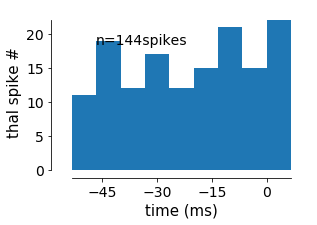

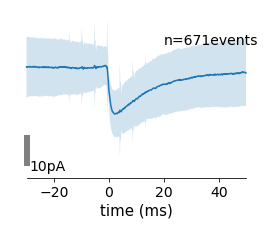

In [90]:
plot_ipsc_waveform(*get_ISPC_waveform(Inh_data3));
plot_previous_thal_spikes(*compute_IPSC_trig_thal_firing(Inh_data3));

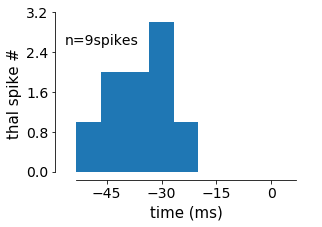

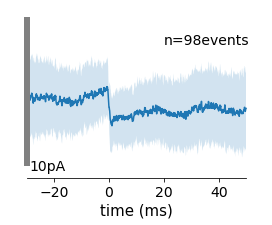

In [93]:
plot_ipsc_waveform(*get_ISPC_waveform(Inh_data4));
plot_previous_thal_spikes(*compute_IPSC_trig_thal_firing(Inh_data4));

In [106]:
from analysis.process import compute_IPSC_and_Thal_frequency_in_down_state

In [118]:
def plot_freqs_IPSC_vs_Thal(data, limit=np.inf):
    cond = data['Thal_freq_per_down']<limit
    lin = np.polyfit(data['Thal_freq_per_down'][cond],
                     data['IPSC_freq_per_down'][cond], 1)
    x = np.linspace(data['Thal_freq_per_down'][cond].min(), data['Thal_freq_per_down'][cond].max())
    plt.plot(data['Thal_freq_per_down'][cond], data['IPSC_freq_per_down'][cond],'o')
    plt.plot(x, np.polyval(lin, x),'--')
    set_plot(plt.gca(), xlabel='Thal Freq. (Hz)', ylabel='IPSC Freq. (Hz)')

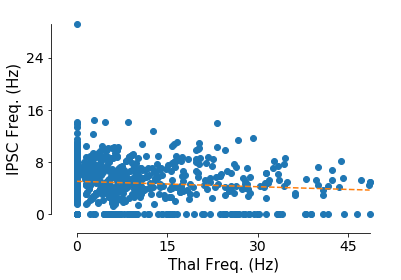

In [120]:
compute_IPSC_and_Thal_frequency_in_down_state(Inh_data1)
plot_freqs_IPSC_vs_Thal(Inh_data1, limit=50)

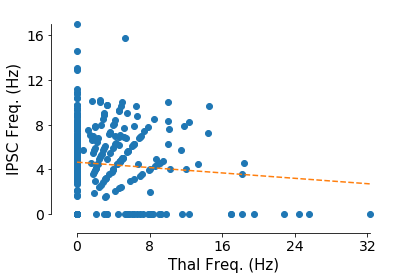

In [115]:
compute_IPSC_and_Thal_frequency_in_down_state(Inh_data2)
plot_freqs_IPSC_vs_Thal(Inh_data2)

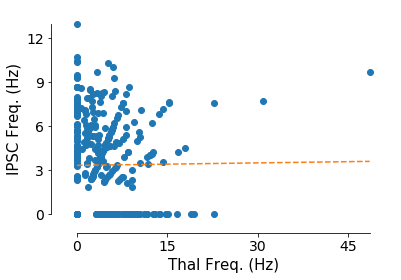

In [116]:
compute_IPSC_and_Thal_frequency_in_down_state(Inh_data3)
plot_freqs_IPSC_vs_Thal(Inh_data3)

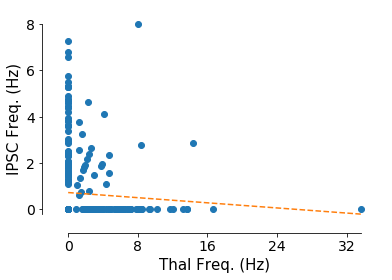

In [117]:
compute_IPSC_and_Thal_frequency_in_down_state(Inh_data4)
plot_freqs_IPSC_vs_Thal(Inh_data4)

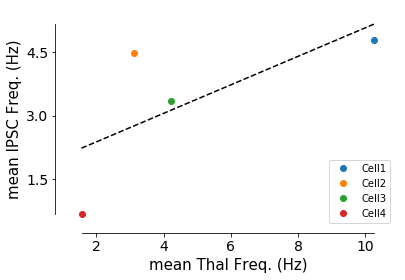

In [125]:
x, y = [], []
for data, cell in zip([Inh_data1, Inh_data2, Inh_data3, Inh_data4], ['Cell1', 'Cell2', 'Cell3', 'Cell4']):
    plt.plot([data['Thal_freq_per_down'].mean()], [data['IPSC_freq_per_down'].mean()],'o', label=cell)
    x.append(data['Thal_freq_per_down'].mean())
    y.append(data['IPSC_freq_per_down'].mean())
lin = np.polyfit(x, y, 1)
x = np.linspace(np.array(x).min(), np.array(x).max())
plt.plot(x, np.polyval(lin, x),'k--')
plt.gca().legend(loc='lower right')
set_plot(plt.gca(), xlabel='mean Thal Freq. (Hz)', ylabel='mean IPSC Freq. (Hz)')